<a href="https://colab.research.google.com/github/deburg0/udlbook/blob/main/Notebooks/Chap04/PlotInputNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

In [2]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = np.ndarray.clip(preactivation,0)

  return activation

In [3]:
# Define a shallow neural network with, one input, one output, and three hidden units
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  # TODO Replace the code below to compute the three initial lines
  # from the theta parameters (i.e. implement equations at bottom of figure 3.3a-c).  These are the preactivations
  pre_1 = theta_10 + theta_11*x
  pre_2 = theta_20 + theta_21*x
  pre_3 = theta_30 + theta_31*x

  # TODO Replace the code below to compute the three activations from the preactivations

  # Pass these through the ReLU function to compute the activations as in
  # figure 3.3 d-f
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)

  # TODO Replace the code below to weight the activations using phi1, phi2 and phi3
  # To create the equivalent of figure 3.3 g-i
  w_act_1 = phi_1*act_1
  w_act_2 = phi_2*act_2
  w_act_3 = phi_3*act_3

  # TODO Replace the code below to combining the weighted activations and add
  # phi_0 to create the output as in figure 3.3 j
  y = phi_0+w_act_1+w_act_2+w_act_3

  # Return everything we have calculated
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3


In [22]:
# Plot the shallow neural network.  We'll assume input in is range [0,1] and output [-1,1]
# If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3
def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([-1,1])
        #ax[plot_y,plot_x].set_aspect(1.0)
      ax[2,plot_y].set_xlabel('Input, $x$');
    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input, $x$'); ax.set_ylabel('Output, $y$')
  ax.set_xlim([-1,1])
  ax.set_aspect(1.0)
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i],)
  plt.show()

In [23]:
# Now lets define some parameters and run the first neural network
n1_theta_10 = 0.0   ; n1_theta_11 = -1.0
n1_theta_20 = 0     ; n1_theta_21 = 1.0
n1_theta_30 = -0.67 ; n1_theta_31 =  1.0
n1_phi_0 = 1.0; n1_phi_1 = -2.0; n1_phi_2 = -3.0; n1_phi_3 = 9.3

In [24]:
x = np.arange(-1,1,0.001)
# We run the first  and second neural networks for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
  shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)

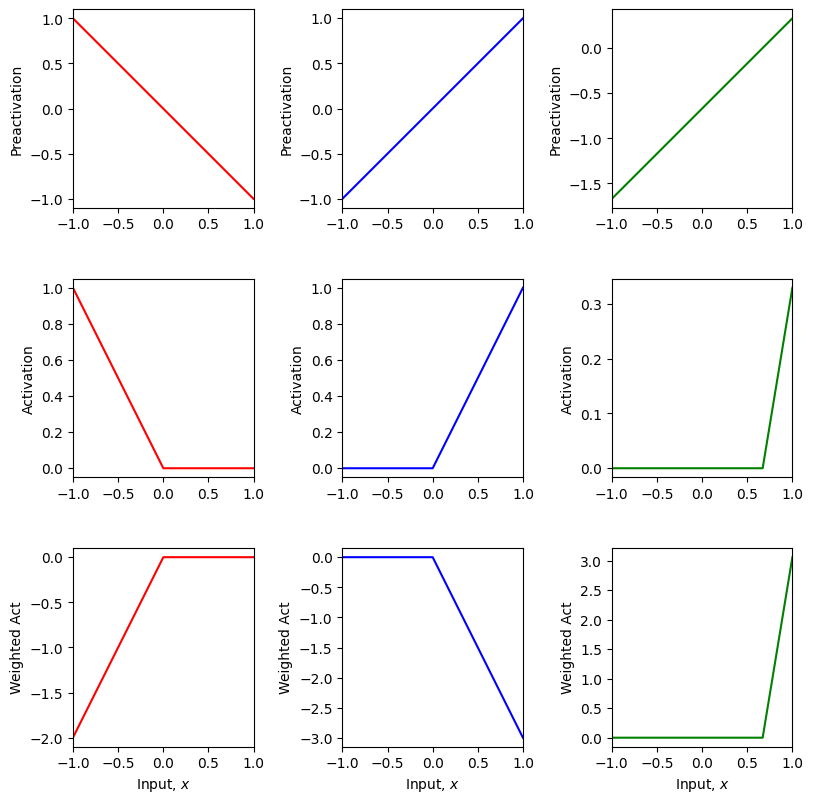

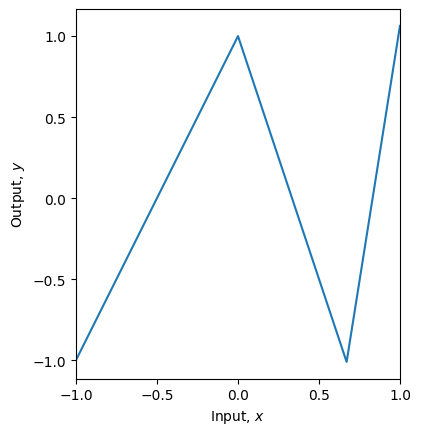

In [25]:
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

Output of network is designed to be between $-1$ and $+1$